𝑦1¯=5 ,  𝑦2¯=8 ,  𝑠1=1 ,  𝑠2=3 ,  𝑁1=200 ,  𝑁2=500 
𝑦1¯=1090 ,  𝑦2¯=999 ,  𝑠1=400 ,  𝑠2=30 ,  𝑁1=900 ,  𝑁2=100 
𝑦1¯=45 ,  𝑦2¯=40 ,  𝑠1=45 ,  𝑠2=40 ,  𝑁1=2000 ,  𝑁2=2000


𝑦1¯  and  𝑦2¯  represent the sample means of groups 1 and 2.
𝑠1  and  𝑠2  represent the sample standard deviations of groups 1 and 2.
𝑁1  and  𝑁2  represent the sample sizes for groups 1 and 2.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


#Storing our randomly generated data and labels.
data = [5,8]
groups = [5,8]
labels_var = [1,3]
labels_size = [200,500]

#The values we use for the standard deviations and the sample sizes.
variability = [1,3]
sizes = [200,500]



In [10]:
#Putting the data together in a data frame and checking it.

data = pd.DataFrame({'data': data, 
                     'groups' : groups,
                    'variability':labels_var,
                    'size':labels_size})
print(data.head())

   data  groups  variability  size
0     5       5            1   200
1     8       8            3   500


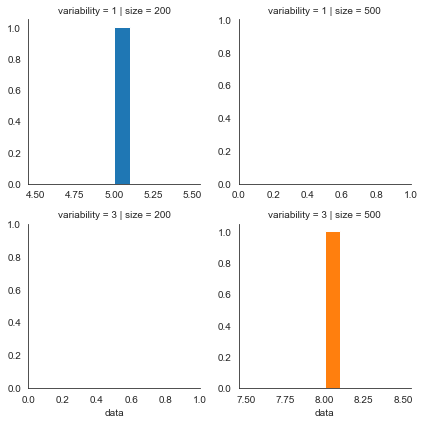

In [11]:
# Plotting the data.  
# Because we organized the data frame in a stacked (long) format, the plotting code is very straightforward.
sns.set_style('white')

g = sns.FacetGrid(data, col="size", row="variability", hue='groups', sharex=False, sharey=False)
g.map(plt.hist,'data')
plt.show()

In [12]:
# Setting the three non-data columns to work as multi-indices. 
# This makes it much easier to get subsections of stacked data.
data_test = data.set_index(['groups','size','variability'])

# Storing our t-values and p-values (we'll get to p-values in a sec).
tvalues=[]
pvalues=[]

#For each combination of sample size and variability, compare the two groups using a t-test
for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1',size,var),level=('groups','size','variability'))
        b = data_test['data'].xs(('group2',size,var),level=('groups','size','variability'))
        tval,pval=stats.ttest_ind(b, a,equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)


KeyError: 'group1'

In [13]:
#Creating a data frame for plotting purposes.
tvalues_plot=pd.DataFrame({'t':tvalues,
                           'p':pvalues,
                          'variability':variability*3,
                          'size':np.repeat(sizes,3)})

# t-values by variability
ax = sns.barplot(y='t',x='variability',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by variability')
plt.show()

# t-values by sample size
ax = sns.barplot(y='t',x='size',ci=None,data=tvalues_plot,palette='Set3')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()

ValueError: arrays must all be same length